In [1923]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.kde import gaussian_kde



In [1924]:
DJ_daily=pd.read_csv('DJ_daily.csv').iloc[:,[0,-1]].rename(columns={'Last(Q.DJI)':'Last'})
DJ_weekly=pd.read_csv('DJ_weekly.csv').iloc[:,[0,-1]].rename(columns={'Last(Q.DJI)':'Last'})
DJ_yearly=pd.read_csv('DJ_yearly.csv').iloc[:,[0,-1]].rename(columns={'Last(Q.DJI)':'Last'})
DJ_daily=DJ_daily.reindex(index=DJ_daily.index[::-1]).reset_index(drop=True)
DJ_weekly=DJ_weekly.reindex(index=DJ_weekly.index[::-1]).reset_index(drop=True)
DJ_yearly=DJ_weekly.reindex(index=DJ_yearly.index[::-1]).reset_index(drop=True)

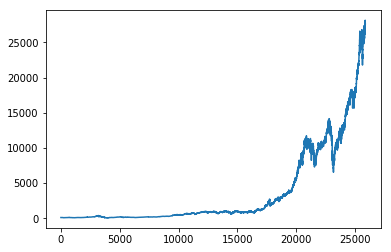

In [1925]:
plt.plot(DJ_daily.Last)

In [1926]:
DJ_daily.Date=pd.to_datetime(DJ_daily.Date,format='%d/%m/%Y')
DJ_weekly.Date=pd.to_datetime(DJ_weekly.Date,format='%d/%m/%Y')
DJ_yearly.Date=pd.to_datetime(DJ_yearly.Date,format='%d/%m/%Y')
# DJ_daily=DJ_daily[DJ_daily['Date']<'2014-1-1']
# DJ_weekly=DJ_weekly[DJ_weekly['Date']<'2014-1-1']
# DJ_yearly=DJ_yearly[DJ_yearly['Date']<'2014-1-1']

In [1927]:

DJ_daily=DJ_daily[DJ_daily['Date']<'1991-01-01']



In [1928]:
daily_return=(np.log(DJ_daily.loc[1:,'Last'].values)-np.log(DJ_daily.loc[:,'Last'][:-1].values))
weekly_return=(np.log(DJ_daily.loc[5:,'Last'].values)-np.log(DJ_daily.loc[:,'Last'][:-5].values))
yearly_return=(np.log(DJ_daily.loc[250:,'Last'].values)-np.log(DJ_daily.loc[:,'Last'][:-250].values))
weekly_return=weekly_return/np.std(weekly_return)
yearly_return=yearly_return/np.std(yearly_return)

In [1929]:
DJ_weekly

,Date,Last
0,1896-05-31,40.63
1,1896-06-07,40.34
2,1896-06-14,39.55
3,1896-06-21,39.89
4,1896-06-28,37.04
5,1896-07-05,34.74
6,1896-07-12,35.60
7,1896-07-19,31.50
8,1896-07-26,31.68
9,1896-08-02,31.74


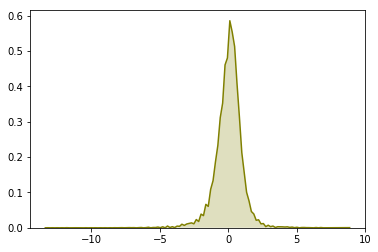

In [1930]:
sns.kdeplot(weekly_return, shade=True, bw=.02,color="olive")

(-10, 10)

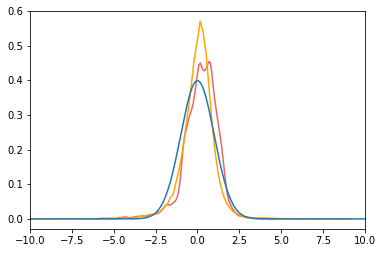

In [1935]:
sns.kdeplot(yearly_return, shade=False, bw=.1,color="#ef6565")
sns.kdeplot(weekly_return, shade=False, bw=.1,color="orange")
# sns.distplot(yearly_return,bins=100)
# sns.distplot(weekly_return,bins=100)
x=np.linspace(-10,10,1000)
plt.plot(x, stats.norm.pdf(x, 0, 1))
plt.xlim((-10,10))


(0, 0.07)

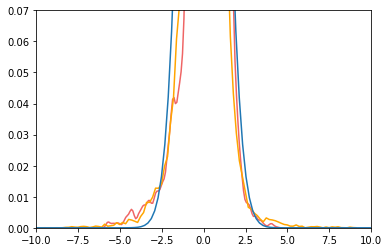

In [413]:
sns.kdeplot(yearly_return, shade=False, bw=.1,color="#ef6565")
sns.kdeplot(weekly_return, shade=False, bw=.1,color="orange")
# sns.distplot(yearly_return,bins=100)
# sns.distplot(weekly_return,bins=100)
plt.plot(x, stats.norm.pdf(x, 0, 1))
plt.xlim((-10,10))
plt.ylim((0,0.07))

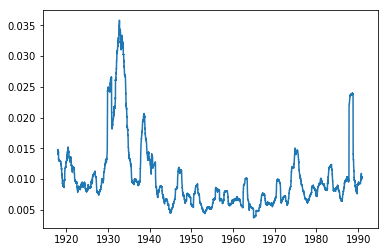

In [1050]:

a=[]
for i in range(len(daily_return)-250):
    a.append(np.std(daily_return[i:i+250]))
plt.plot(DJ_daily.loc[251:,'Date'],a)

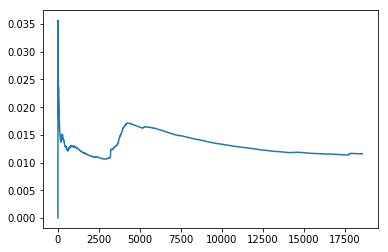

In [416]:
a=[]
for i in range(len(daily_return)):
    a.append(np.std(daily_return[:i]))
plt.plot(a)

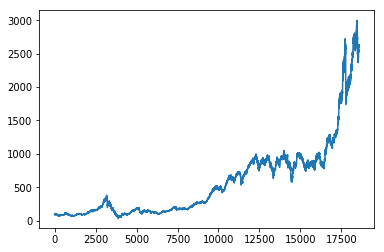

In [418]:
plt.plot(DJ_daily.Last)

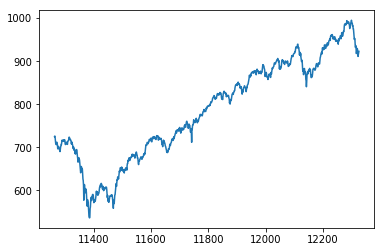

In [434]:
plt.plot(DJ_daily.loc[(DJ_daily['Date']>'1961-12-31') & (DJ_daily['Date']<'1966-3-20'),'Last'])

# Section 2: trading simulation

In [274]:
print(np.mean(daily_return))
print(np.var(daily_return))

0.00017714453290607372
0.00013409705039064062


In [440]:
sigma
np.std(daily_return)

0.011580028082463384

321 7


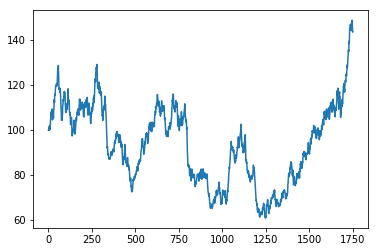

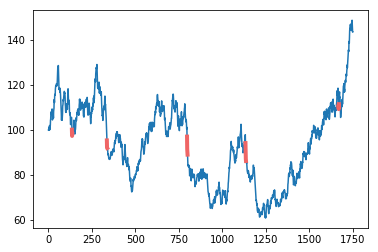

In [1641]:
## r=0.05/250
# sigma=0.05/250




def new_price(R_t,r,sigma,a_s,a_l,a_m,d,days):
    R_t2=R_t.copy()

    def h_s(x,R_t2,t_s):
        if x>t_s:
            return 0,-a_s*x
        else:
            return 1,-d

    def h_l(x,R_t2,t_l):
        if x>t_l:
            return 0,-a_l*x
        else:
            return 1,-d

    def M(x):
        if x>0:
            return a_m*x
        else:
            return 0
    long_list,short_list=[0 for i in range(days)],[0 for i in range(days)]
    for i in range(days):
        x=R_t2[-1]-r
        t_s = np.mean(R_t[-1:])-1.1*np.std(daily_return)
        t_l = np.mean(R_t[-10:])-1.1*np.std(tenday_return)
        long,h_long=h_l(x,R_t2,t_l)
        short,h_short=h_s(x,R_t2,t_s)
        
        #print(t_s,short,t_l,long,x)
        
        change=np.random.normal(r,sigma)+h_long+h_short+M(x)
        
        long_list[i]=long
        short_list[i]=short
        R_t2.append(change)
    return R_t2[10:],long_list,short_list



np.random.seed(186)

tenday_return=(np.log(DJ_daily.loc[10:,'Last'].values)-np.log(DJ_daily.loc[:,'Last'][:-10].values))
r=np.mean(daily_return)
sigma=np.std(daily_return)
a_s=0.4
a_l=0.4
a_m=1
R_t=list(np.random.normal(r,sigma,10))

days=1750
d=0.018
price_change,long_list,short_list=new_price(R_t,r,sigma,a_s,a_l,a_m,d,days)
index=[100 for i in range(len(price_change)+1)]
for n,i in enumerate(price_change):
    index[n+1]=index[n]*(1+i)
plt.plot(index)
print(sum(short_list),sum(long_list))
plt.show()
long_list=[0]+long_list+[0]
new_list=[np.nan for i in index]
for n,i in enumerate(index):
    if long_list[n]==1 or long_list[n-1]==1 or long_list[n+1]==1:
        new_list[n]=i
plt.plot(index)
plt.plot(new_list,color='#ef6565',lw=4)

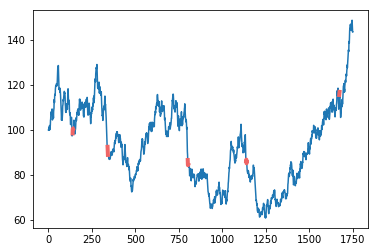

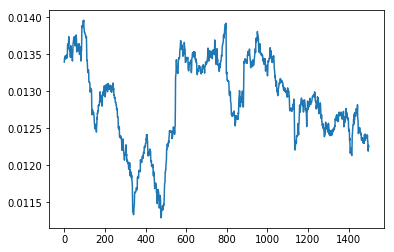

In [1625]:
volatility1=[np.std(price_change[i:250+i]) for i in range(days-250)]
plt.plot(volatility1)


In [1626]:
len(index)

1751

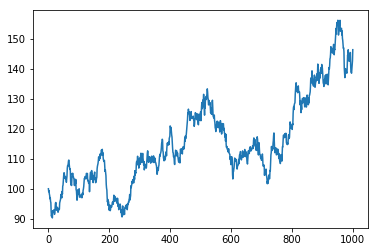

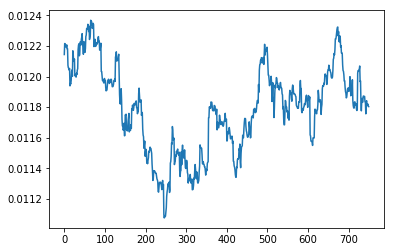

In [1248]:
AAA=list(np.random.normal(r,sigma,1000))
BBB=[100 for i in range(len(AAA)+1)]
for n,i in enumerate(AAA):
    BBB[n+1]=BBB[n]*(1+i)
plt.plot(BBB)
plt.show()
plt.plot([np.std(AAA[i:250+i]) for i in range(1000-250)])
plt.show()

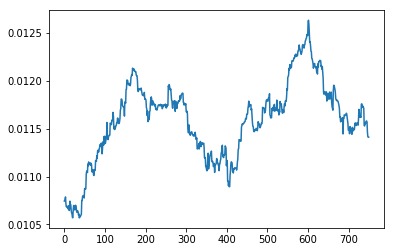

0.03800305557271679 0.011580028082463384
0.0017843322740562213 0.00017714453290607372


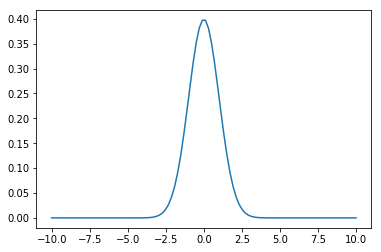

In [142]:
mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 10*sigma, mu + 10*sigma, 100)



In [438]:
s='aabbccaabbcc'
t='aabbcc'

def gcdOfStrings(str1: str, str2: str) -> str:

    str1Length, str2Length = len(str1), len(str2)

    if str2Length > str1Length: # Ensures the longer string is str1 and shorter or equal string is str2
        return gcdOfStrings(str2, str1)

    if str1[:str2Length] == str2: # Check if shorter string (str2) is a prefix in longer string (str1)

        if str1Length == str2Length: # If str1 and str2 are of the same length then we have found the common divisor
            return str2

        return gcdOfStrings(str2, str1[str2Length:]) # return the gcd of the str2 and str1 minus the prefix

    return ""

gcdOfStrings(s,t)


'aabbcc'

In [487]:
def find_common(s):
    n=len(s)

    for i in range(int(n/2)):
        if n%(i+1)==0:
            if s.count(s[:i+1])==n/(i+1):
                return i+1
    return n

def find_common_divisor(s,t):
    len1,len2 = len(s),len(t)
    if len1<len2:
        return ""
    elif s[:len2]==t:
        if s==t:
            return t
        else:
            return find_common_divisor(s[:len2], t)
    else:
        return ""
def findSmallestDivisor(s, t):
       
    common_divisor = find_common_divisor(s,t)
    if common_divisor == "":
        return -1
    else:
        return find_common(common_divisor)

In [499]:
s='bcdbcdbcd'
t='bcdbcd'
findSmallestDivisor(s,t)


3

In [486]:
find_common_divisor(s,t)

'ABC'

In [500]:
def coprimeCount(A):
    ans=[]
    for num in A:
        p=2
        remainder=num
        numprimelist=[]
        while remainder>1:
            if remainder%p==0:
                numprimelist.append(p)
                while remainder%p==0:
                    remainder=remainder//p
            p+=1
            
        result=num    
        for p in numprimelist:
            result=result*(1-1/p)
        result=int(result)
        ans.append(result)
    return ans

In [506]:
A=[1]
coprimeCount(A)

[1]

In [508]:
def  coprimeCount( A):
    ans=[]
    for num in A:
        p=2
        remainder=num
        plist=[]
        while remainder>1:
            if remainder%p==0:
                plist.append(p)
                while remainder%p==0:
                    remainder=remainder//p
            p+=1
        phi=num
        for p in plist:
            phi=phi*(1-1/p)
        phi=int(phi)
        ans.append(phi)
    return ans
coprimeCount([1,2,3])

[1, 1, 2]

In [513]:
import eikon

233 16


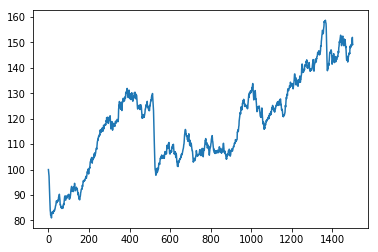

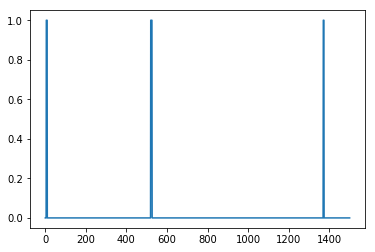

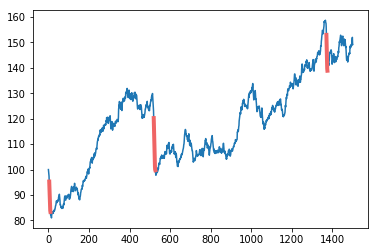

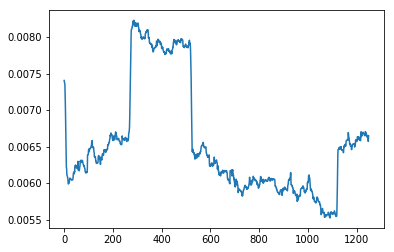

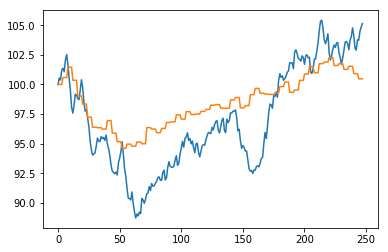

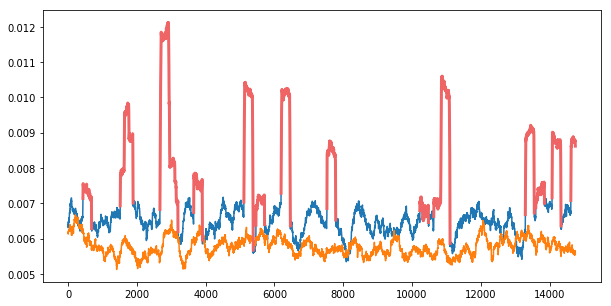

In [1891]:





## r=0.05/250
# sigma=0.05/250




def new_price(R_t,r,sigma,r2,sigma2,a_s,a_l,a_m,d,days):
    R_t2=R_t.copy()

    def h_s(x,R_t2,t_s):
        if x>t_s:
            return 0,-a_s*x
        else:
            return 1,-d

    def h_l(x,R_t2,t_l):
        if x>t_l:
            return 0,-a_l*x
        else:
            return 1,-d*1.6

    def M(x):
        if x>0:
            return a_m*x
        else:
            return 0
    long_list,short_list=[0 for i in range(days)],[0 for i in range(days)]
    for i in range(days):
        x=R_t2[-1]-r
        t_s = np.mean(R_t[-1:])-1.12*sigma
        t_l = np.mean(R_t[-10:])-1.12*sigma2
        long,h_long=h_l(x,R_t2,t_l)
        short,h_short=h_s(x,R_t2,t_s)
        
        #print(t_s,short,t_l,long,x)
        
        change=np.random.normal(r,sigma)+h_long+h_short+M(x)
        
        long_list[i]=long
        short_list[i]=short
        R_t2.append(change)
    return R_t2[10:],long_list,short_list



np.random.seed(110
              )

tenday_return=(np.log(DJ_daily.loc[10:,'Last'].values)-np.log(DJ_daily.loc[:,'Last'][:-10].values))

r=np.mean(daily_return)
sigma=np.std(daily_return)/2
r2=np.mean(tenday_return)
sigma2=np.std(tenday_return)/2


a_s=0.4
a_l=0.4
a_m=1
R_t=list(np.random.normal(r,sigma,10))

days=1500
d=0.0097
price_change,long_list,short_list=new_price(R_t,r,sigma,r2,sigma2,a_s,a_l,a_m,d,days)

index=[100 for i in range(len(price_change)+1)]
for n,i in enumerate(price_change):
    index[n+1]=index[n]*(1+i)
plt.plot(index)
print(sum(short_list),sum(long_list))
plt.show()
long_list=[0]+long_list+[0]
plt.plot(long_list)
plt.show()

new_list=[np.nan for i in index]
for n,i in enumerate(index):
    if long_list[n]==1 or long_list[n-1]==1 or long_list[n+1]==1:
        new_list[n]=i
plt.plot(index)
plt.plot(new_list,color='#ef6565',lw=4)
plt.show()


volatility1=[np.std(price_change[i:250+i]) for i in range(days-250)]
plt.plot(volatility1)
plt.show()

Yearly=index[1000:1248]
Quarterly=index[1050:1112]
Yearly=[i/Yearly[0]*100 for i in Yearly]
Quarterly=[Quarterly[i//4]/Quarterly[0]*100 for i in range(len(Yearly))]
plt.plot(Yearly)
plt.plot(Quarterly)


days=15000
d=0.0102
price_change,long_list,short_list=new_price(R_t,r,sigma,r2,sigma2,a_s,a_l,a_m,d,days)

index=[100 for i in range(len(price_change)+1)]
for n,i in enumerate(price_change):
    index[n+1]=index[n]*(1+i)

volatility1=[np.std(price_change[i:250+i]) for i in range(days-250)]


new_list2=[np.nan for i in volatility1]
for n,i in enumerate(volatility1):
    if np.sum(long_list[n:n+250])!=0:
        new_list2[n]=i

refered_list=list(np.random.normal(r,sigma,15000))
plt.figure(figsize=(10,5))
plt.plot(volatility1)
plt.plot([np.std(refered_list[i:250+i]) for i in range(days-250)])
plt.plot(new_list2,color='#ef6565',lw=3)

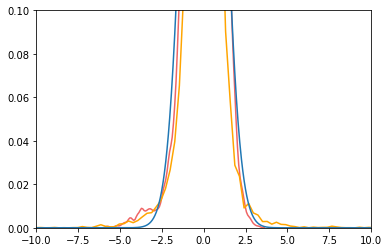

In [1943]:
sns.kdeplot(price_change/np.std(price_change), shade=False, bw=.1,color="#ef6565")
sns.kdeplot(daily_return/np.std(daily_return), shade=False, bw=.1,color="orange")
x=np.linspace(-10,10,1000)
plt.plot(x, stats.norm.pdf(x, 0, 1))
plt.xlim((-10,10))
plt.ylim((0,0.1))
plt.show()

#### With d same for both type of investors, the structure is less significant

223 4


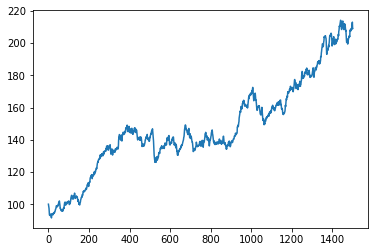

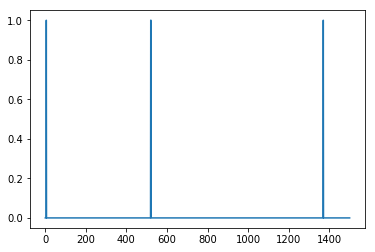

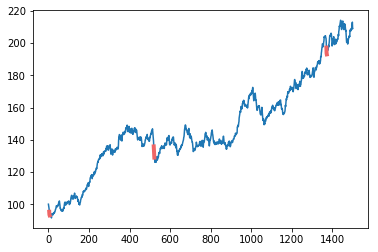

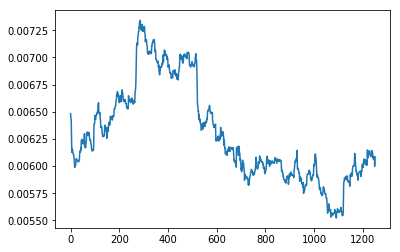

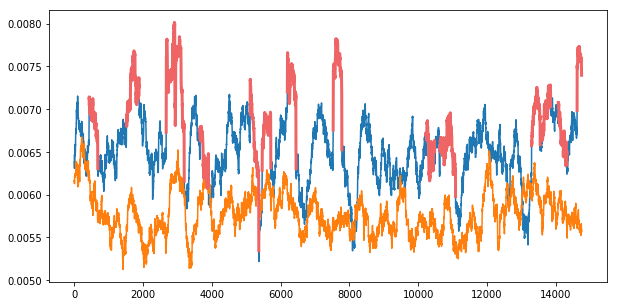

In [1859]:


## r=0.05/250
# sigma=0.05/250




def new_price(R_t,r,sigma,r2,sigma2,a_s,a_l,a_m,d,days):
    R_t2=R_t.copy()

    def h_s(x,R_t2,t_s):
        if x>t_s:
            return 0,-a_s*x
        else:
            return 1,-d

    def h_l(x,R_t2,t_l):
        if x>t_l:
            return 0,-a_l*x
        else:
            return 1,-d

    def M(x):
        if x>0:
            return a_m*x
        else:
            return 0
    long_list,short_list=[0 for i in range(days)],[0 for i in range(days)]
    for i in range(days):
        x=R_t2[-1]-r
        t_s = np.mean(R_t[-1:])-1.12*sigma
        t_l = np.mean(R_t[-10:])-1.12*sigma2
        long,h_long=h_l(x,R_t2,t_l)
        short,h_short=h_s(x,R_t2,t_s)
        
        #print(t_s,short,t_l,long,x)
        
        change=np.random.normal(r,sigma)+h_long+h_short+M(x)
        
        long_list[i]=long
        short_list[i]=short
        R_t2.append(change)
    return R_t2[10:],long_list,short_list



np.random.seed(110
              )

tenday_return=(np.log(DJ_daily.loc[10:,'Last'].values)-np.log(DJ_daily.loc[:,'Last'][:-10].values))

r=np.mean(daily_return)
sigma=np.std(daily_return)/2
r2=np.mean(tenday_return)
sigma2=np.std(tenday_return)/2


a_s=0.4
a_l=0.4
a_m=1
R_t=list(np.random.normal(r,sigma,10))

days=1500
d=0.0097
price_change,long_list,short_list=new_price(R_t,r,sigma,r2,sigma2,a_s,a_l,a_m,d,days)

index=[100 for i in range(len(price_change)+1)]
for n,i in enumerate(price_change):
    index[n+1]=index[n]*(1+i)
plt.plot(index)
print(sum(short_list),sum(long_list))
plt.show()
long_list=[0]+long_list+[0]
plt.plot(long_list)
plt.show()

new_list=[np.nan for i in index]
for n,i in enumerate(index):
    if long_list[n]==1 or long_list[n-1]==1 or long_list[n+1]==1:
        new_list[n]=i
plt.plot(index)
plt.plot(new_list,color='#ef6565',lw=4)
plt.show()


volatility1=[np.std(price_change[i:250+i]) for i in range(days-250)]
plt.plot(volatility1)


days=15000
d=0.0102
price_change,long_list,short_list=new_price(R_t,r,sigma,r2,sigma2,a_s,a_l,a_m,d,days)

index=[100 for i in range(len(price_change)+1)]
for n,i in enumerate(price_change):
    index[n+1]=index[n]*(1+i)

volatility1=[np.std(price_change[i:250+i]) for i in range(days-250)]


new_list2=[np.nan for i in volatility1]
for n,i in enumerate(volatility1):
    if np.sum(long_list[n:n+250])!=0:
        new_list2[n]=i

refered_list=list(np.random.normal(r,sigma,15000))
plt.figure(figsize=(10,5))
plt.plot(volatility1)
plt.plot([np.std(refered_list[i:250+i]) for i in range(days-250)])
plt.plot(new_list2,color='#ef6565',lw=3)

## Now test restricted model

329


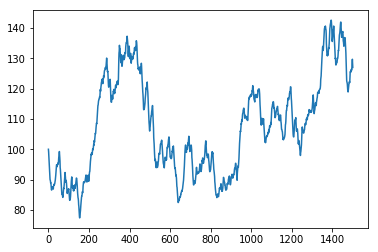

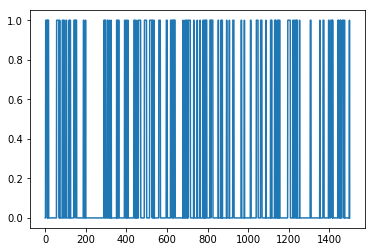

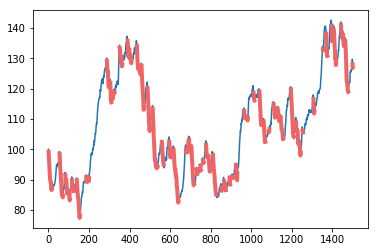

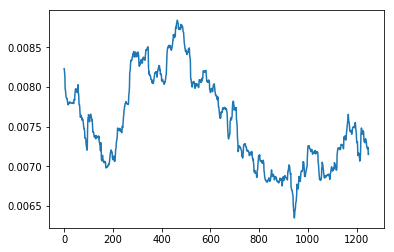

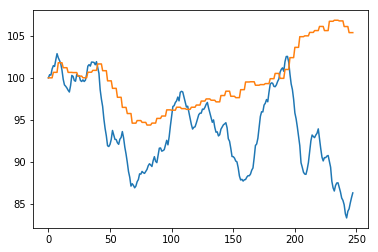

In [1867]:





## r=0.05/250
# sigma=0.05/250




def new_price(R_t,r,sigma,a_s,a_l,a_m,d,days):
    R_t2=R_t.copy()

    def h_s(x,R_t2,t_s):
        if x>t_s:
            return 0,-a_s*x
        else:
            return 1,-d

    def M(x):
        if x>0:
            return a_m*x
        else:
            return 0
    long_list,short_list=[0 for i in range(days)],[0 for i in range(days)]
    for i in range(days):
        x=R_t2[-1]-r
        t_s = np.mean(R_t[-1:])-1.12*sigma

        short,h_short=h_s(x,R_t2,t_s)
        
        #print(t_s,short,t_l,long,x)
        
        change=np.random.normal(r,sigma)+h_short+M(x)
        
        short_list[i]=short
        R_t2.append(change)
    return R_t2[10:],short_list



np.random.seed(110)

r=np.mean(daily_return)
sigma=np.std(daily_return)/2



a_s=0.4
a_m=1
R_t=list(np.random.normal(r,sigma,10))

days=1500
d=0.0097
price_change,short_list=new_price(R_t,r,sigma,a_s,a_l,a_m,d,days)

index=[100 for i in range(len(price_change)+1)]
for n,i in enumerate(price_change):
    index[n+1]=index[n]*(1+i)
plt.plot(index)
print(sum(short_list))
plt.show()
short_list=[0]+short_list+[0]
plt.plot(short_list)
plt.show()




new_list=[np.nan for i in index]
for n,i in enumerate(index):
    if short_list[n]==1 or short_list[n-1]==1 or short_list[n+1]==1:
        new_list[n]=i
plt.plot(index)
plt.plot(new_list,color='#ef6565',lw=4)
plt.show()


volatility1=[np.std(price_change[i:250+i]) for i in range(days-250)]
plt.plot(volatility1)
plt.show()




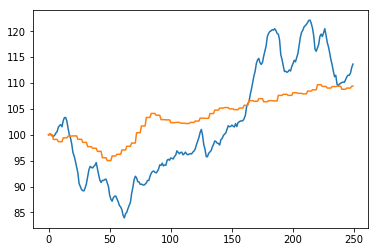

In [1890]:
start=1180

Quarterly=index[(start+50):(start+50+63)]
Yearly=index[start:start+250]

Yearly=[i/Yearly[0]*100 for i in Yearly]
Quarterly=[Quarterly[i//4]/Quarterly[0]*100 for i in range(len(Yearly))]
plt.plot(Yearly)
plt.plot(Quarterly)



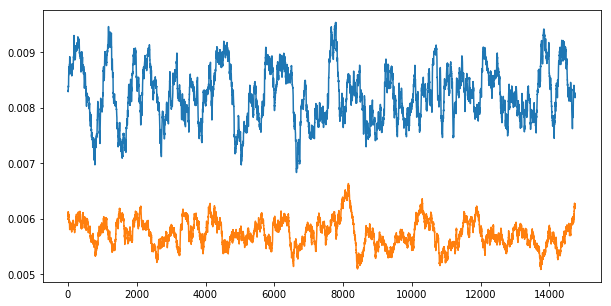

In [1866]:
days=15000
d=0.0102
price_change,short_list=new_price(R_t,r,sigma,a_s,a_l,a_m,d,days)

index=[100 for i in range(len(price_change)+1)]
for n,i in enumerate(price_change):
    index[n+1]=index[n]*(1+i)

volatility1=[np.std(price_change[i:250+i]) for i in range(days-250)]



refered_list=list(np.random.normal(r,sigma,15000))
plt.figure(figsize=(10,5))
plt.plot(volatility1)
plt.plot([np.std(refered_list[i:250+i]) for i in range(days-250)])


## section 4    H measure

In [2185]:
def hurst(ts,p,n):
    ts = list(ts)
    N = len(ts)
    if N < 20:
        raise ValueError("Time series is too short! input series ought to have at least 20 samples!")
    max_k = int(np.floor(N/2))
    R_S_dict = []
    for k in range(p,n):
        R,S = 0,0
        # split ts into subsets
        subset_list = [ts[i:i+k] for i in range(0,N,k)]
        if np.mod(N,k)>0:
            subset_list.pop()
            #tail = subset_list.pop()
            #subset_list[-1].extend(tail)
        # calc mean of every subset
        mean_list=[np.mean(x) for x in subset_list]
        R=[]
        for i in range(len(subset_list)):
            cumsum_list = pd.Series(subset_list[i]-mean_list[i]).cumsum()
            R.append((max(cumsum_list)-min(cumsum_list))/np.std(subset_list[i]))
        R_S_dict.append({"R":R,"n":k})
    
    log_R_S = []
    log_n = []
    for i in range(len(R_S_dict)):
        R_S = np.mean(R_S_dict[i]["R"])
        log_R_S.append(np.log(R_S))
        log_n.append(np.log(R_S_dict[i]["n"]))
    Hurst_exponent = np.polyfit(log_n,log_R_S,1)[0]
    return Hurst_exponent

hurst(N_return,10,41)

0.6219023590080304

In [2225]:

N_return=(np.log(DJ_daily.loc[1:,'Last'].values)-np.log(DJ_daily.loc[:,'Last'][:-1].values))

def RS_value(N_return,n):
    N=len(N_return)
    A=N//n
    N_return=N_return[:A*n]
    list_of_sublist = np.split(N_return,A)
    mean_of_sublist = np.mean(list_of_sublist,axis=1)
    list_of_sublist = list_of_sublist - mean_of_sublist[:, None]
    cumu_of_sublist = np.cumsum(list_of_sublist,axis=1)
    RS_value = np.mean((np.max(cumu_of_sublist,axis=1)-np.min(cumu_of_sublist,axis=1))/np.std(list_of_sublist,axis=1))
    return RS_value

list_RS=[]
list_n=[]
#for n in range(10,len(N_return)//2+1):
for n in range(10,51):
    list_RS.append(RS_value(N_return,n))
    list_n.append(n)
    print('\r' +'current is: {}'.format(n),end='')

current is: 50

0.6148810580845125

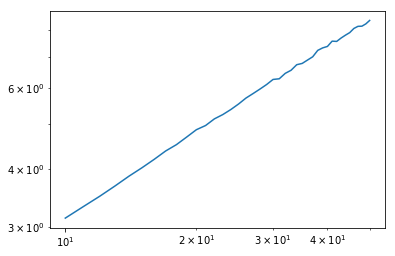

In [2226]:
plt.loglog(list_n,list_RS)
np.polyfit(np.log(list_n),np.log(list_RS),1)[0]


current is: 50

0.12393208575106415

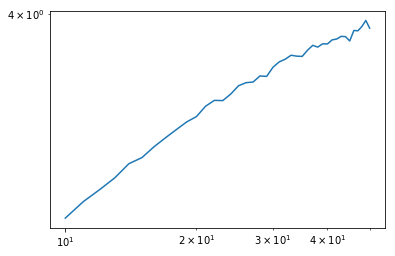

In [2227]:
n=10
N_return=(np.log(DJ_daily.loc[1:,'Last'].values)-np.log(DJ_daily.loc[:,'Last'][:-1].values))
list_RS=[]
list_n=[]
for n in range(10,51):
    N=len(N_return)
    A=N//n
    N_return=N_return[:A*n]
    list_of_sublist=[N_return[(i*n):(i*n+n)] for i in range(A)]
    mean_of_sublist=[np.mean(i) for i in list_of_sublist]
    cumu_of_sublist=[[sum([list_of_sublist[a][i]-mean_of_sublist[a] for i in range(k+1)]) for k in range(n)] for a in range(A)]
    Range_of_sublist=[max(i)-min(i) for i in cumu_of_sublist]
    RS_value=np.mean([Range_of_sublist[n]/np.std(R) for n,R in enumerate(cumu_of_sublist)])
    list_RS.append(RS_value)
    list_n.append(n)
    print('\r' +'current is: {}'.format(n),end='')
plt.loglog(list_n,list_RS)
np.polyfit(np.log(list_n),np.log(list_RS),1)[0]

In [2224]:
n=10
N_return=(np.log(DJ_daily.loc[1:,'Last'].values)-np.log(DJ_daily.loc[:,'Last'][:-1].values))
N=len(N_return)
A=N//n
N_return=N_return[:A*n]
list_of_sublist = np.split(N_return,A)
mean_of_sublist = np.mean(list_of_sublist,axis=1)
list_of_sublist = list_of_sublist - mean_of_sublist[:, None]
cumu_of_sublist = np.cumsum(list_of_sublist,axis=1)
RS_value = (np.max(cumu_of_sublist,axis=1)-np.min(cumu_of_sublist,axis=1))/np.std(list_of_sublist,axis=1)
RS_value[0]

2.9302868634685435

In [2222]:
ts = list(N_return)
N = len(ts)
if N < 20:
    raise ValueError("Time series is too short! input series ought to have at least 20 samples!")
max_k = int(np.floor(N/2))
R_S_dict = []
k=10
R,S = 0,0
# split ts into subsets
subset_list = [ts[i:i+k] for i in range(0,N,k)]
if np.mod(N,k)>0:
    subset_list.pop()
    #tail = subset_list.pop()
    #subset_list[-1].extend(tail)
# calc mean of every subset
mean_list=[np.mean(x) for x in subset_list]
R=[]
# for i in range(len(subset_list)):
i=0
cumsum_list = pd.Series(subset_list[i]-mean_list[i]).cumsum()
(max(cumsum_list)-min(cumsum_list))/np.std(subset_list[i])

    

2.9302868634685435

In [2220]:
np.max(cumu_of_sublist,axis=1)-np.min(cumu_of_sublist,axis=1)

array([0.0785926 , 0.04843265, 0.0202892 , ..., 0.01537941, 0.02911551,
       0.0169627 ])

In [2221]:
max(cumsum_list)-min(cumsum_list)

0.07859259996333376

In [2211]:
cumu_of_sublist

array([[ 3.26291824e-03,  1.93125083e-03, -2.21399027e-02, ...,
        -2.61770056e-02, -1.38669270e-02,  3.46944695e-18],
       [ 2.95813495e-02,  7.45558478e-03, -4.23267976e-03, ...,
        -1.57333200e-02, -1.88512955e-02,  6.93889390e-18],
       [-8.00739798e-03,  3.04516668e-03,  3.28444836e-03, ...,
         1.22818046e-02, -2.30082131e-03,  0.00000000e+00],
       ...,
       [-2.08656032e-03,  7.29644551e-03,  1.44010226e-03, ...,
        -6.26689781e-03, -4.05536526e-03, -3.46944695e-18],
       [-5.06049620e-03, -1.31770813e-02,  1.25653542e-03, ...,
         4.83076033e-03,  5.75614535e-03,  3.46944695e-18],
       [ 1.19252730e-02,  6.94795153e-03, -2.89601570e-03, ...,
         2.58826675e-03, -4.07216278e-03,  8.67361738e-19]])

In [2198]:
np.split(N_return,A)

[array([ 0.00142857, -0.00316601, -0.0259055 , -0.05502413,  0.05323794,
         0.0105655 , -0.00490274, -0.01708542,  0.01047573,  0.01203258]),
 array([ 0.03102691, -0.02068021, -0.01024271,  0.00249273,  0.01278104,
        -0.02006895,  0.0033382 , -0.00281588, -0.00167242,  0.02029685]),
 array([-0.00978633,  0.00927364, -0.00153965, -0.00773399, -0.00352588,
         0.0041468 ,  0.00772921, -0.00051343, -0.01636155,  0.00052189]),
 array([-0.00418279, -0.07516448, -0.01720546,  0.05609156,  0.00843978,
        -0.00670273, -0.01365172, -0.00817052,  0.02377282, -0.00553657]),
 array([-0.0022887 ,  0.00174425,  0.01994998,  0.01325787, -0.00995349,
        -0.0151185 ,  0.00849879, -0.00720317, -0.0121582 , -0.00503669]),
 array([ 0.01870433,  0.02363572,  0.00273196,  0.        , -0.00020989,
         0.01230849, -0.01493578,  0.00021044,  0.00115662,  0.00492689]),
 array([ 0.00020912,  0.01370596,  0.01260456, -0.00602627, -0.00853959,
         0.00505026, -0.00981464,  0.00

In [2041]:
BBB[0]

array([ 3.26291824e-03,  1.93125083e-03, -2.21399027e-02, -7.53296817e-02,
       -2.02573933e-02, -7.85754234e-03, -1.09259334e-02, -2.61770056e-02,
       -1.38669270e-02,  3.46944695e-18])